# 0.0 IMPORTS

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import *
import matplotlib.pyplot as plt
import mlflow
import mlflow.sklearn
import warnings


## 0.1 Helper Functions

In [25]:
warnings.filterwarnings("ignore")      


## 0.2 Loading Data

In [26]:
df_raw = pd.read_csv("credit.csv")

# 1.0 - PASSO 01 - DESCRIÇÃO DOS DADOS

In [27]:
# criando backup dos dados
df1_credito = df_raw.copy()
df1_credito.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,'critical/other existing credit',radio/tv,1169,'no known savings',>=7,4,'male single',none,...,'real estate',67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,'existing paid',radio/tv,5951,<100,1<=X<4,2,'female div/dep/mar',none,...,'real estate',22,none,own,1,skilled,1,none,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,<100,4<=X<7,2,'male single',none,...,'real estate',49,none,own,1,'unskilled resident',2,none,yes,good
3,<0,42,'existing paid',furniture/equipment,7882,<100,4<=X<7,2,'male single',guarantor,...,'life insurance',45,none,'for free',1,skilled,2,none,yes,good
4,<0,24,'delayed previously','new car',4870,<100,1<=X<4,3,'male single',none,...,'no known property',53,none,'for free',2,skilled,2,none,yes,bad


## 1.1 Data Dimessions

In [28]:
print("Número de linhas: {}".format(df1_credito.shape[0]))
print("Número de Colunas: {}".format(df1_credito.shape[1]))

Número de linhas: 1000
Número de Colunas: 21


## 1.2 Data Types

In [29]:
df1_credito.dtypes

checking_status           object
duration                   int64
credit_history            object
purpose                   object
credit_amount              int64
savings_status            object
employment                object
installment_commitment     int64
personal_status           object
other_parties             object
residence_since            int64
property_magnitude        object
age                        int64
other_payment_plans       object
housing                   object
existing_credits           int64
job                       object
num_dependents             int64
own_telephone             object
foreign_worker            object
class                     object
dtype: object

In [30]:
# Convertendo dados categoricos em númericos
for col in df1_credito.columns:
    if df1_credito[col].dtypes == 'object':
        df1_credito[col] = df1_credito[col].astype('category').cat.codes


# 2.0 - PASSO 02 - CRIANDO MODELO NAIVE BAYES

## 2.1 Separando dados de treino e teste

In [31]:
# criando backup dos dados
df2_credito = df1_credito.copy()

In [32]:
previsores = df2_credito.iloc[:,0:20].values
classe = df2_credito.iloc[:,20].values
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(previsores,classe, test_size=0.3,random_state=123)

## 2.2 Criação do Modelo e Registro do Experimento

Modelo:  191c1b249ab544328073d153b27f4308


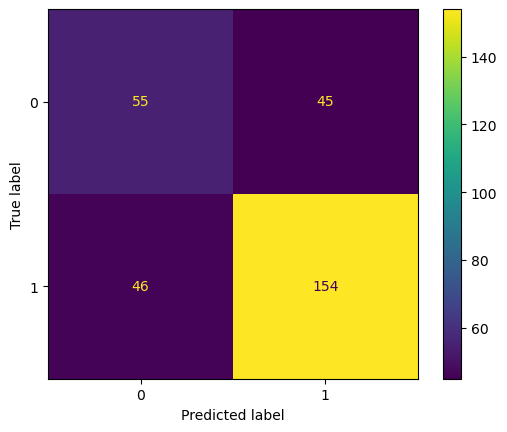

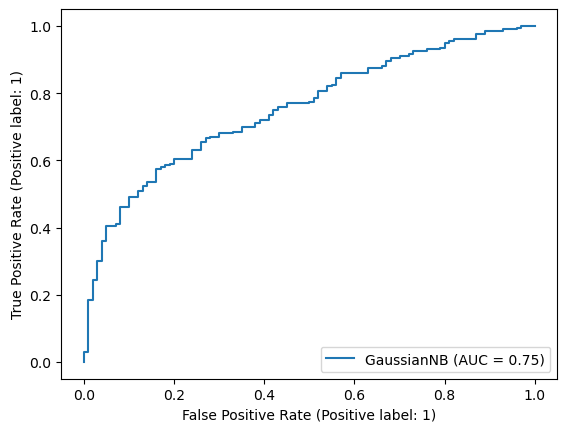

In [33]:
mlflow.set_experiment("nbexperimento")

with mlflow.start_run():

    naive_bayes = GaussianNB()
    naive_bayes.fit(X_treinamento, y_treinamento)
    previsoes = naive_bayes.predict(X_teste)
    
    #métricas
    acuracia = accuracy_score(y_teste, previsoes)
    recall = recall_score(y_teste, previsoes)
    precision = precision_score(y_teste, previsoes)
    f1 = f1_score(y_teste, previsoes)
    auc= roc_auc_score(y_teste, previsoes)
    log = log_loss(y_teste, previsoes)
    
    #registrar métricas
    mlflow.log_metric("acuracia",acuracia)
    mlflow.log_metric("recall",recall)
    mlflow.log_metric("precision",precision)
    mlflow.log_metric("f1",f1)
    mlflow.log_metric("auc",auc)
    mlflow.log_metric("log",log)
    
    #gráficos
    confusion = plot_confusion_matrix(naive_bayes, X_teste, y_teste)
    plt.savefig("confusion.png")
    roc = plot_roc_curve(naive_bayes, X_teste, y_teste)
    plt.savefig("roc.png")
    
    #logar gráficos
    mlflow.log_artifact("confusion.png")
    mlflow.log_artifact("roc.png")   
    
    #modelo
    mlflow.sklearn.log_model(naive_bayes,"ModeloNB")    
    
    #informações da execução
    print("Modelo: ", mlflow.active_run().info.run_uuid)    
mlflow.end_run()